In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

In [2]:
!kaggle datasets download -d rajdalsaniya/pothole-detection-dataset
!kaggle datasets download -d faizalkarim/cleandirty-road-classification

Dataset URL: https://www.kaggle.com/datasets/rajdalsaniya/pothole-detection-dataset
License(s): CC0-1.0
 96%|██████████████████████████████████████▍ | 226M/235M [00:03<00:00, 90.2MB/s]
100%|████████████████████████████████████████| 235M/235M [00:03<00:00, 73.3MB/s]
Dataset URL: https://www.kaggle.com/datasets/faizalkarim/cleandirty-road-classification
License(s): CC0-1.0
 80%|██████████████████████████████▎       | 57.0M/71.6M [00:01<00:00, 52.7MB/s]
100%|██████████████████████████████████████| 71.6M/71.6M [00:01<00:00, 54.6MB/s]


In [3]:
from fastcore.all import *
from fastai.vision.all import *
from zipfile import ZipFile
from pathlib import Path
import os.path

In [4]:
datasets = Path("/kaggle/working/data")
pothole_path = Path(datasets/"potholes")
road_path =  Path(datasets/"roads")

In [5]:
with ZipFile("pothole-detection-dataset.zip", "r") as compressed:
    compressed.extractall(pothole_path)
with ZipFile("cleandirty-road-classification.zip", "r") as compressed:
    compressed.extractall(road_path)

In [6]:
def label_func(f):
    comp = f.parts
    return comp[4]

In [7]:
roads = DataBlock(
blocks = (ImageBlock, CategoryBlock),
get_items = get_image_files,
splitter = RandomSplitter(valid_pct = 0.2, seed= 50),
get_y = label_func,
item_tfms = Resize(460),
batch_tfms = aug_transforms(size = 224, min_scale = 0.75)
)

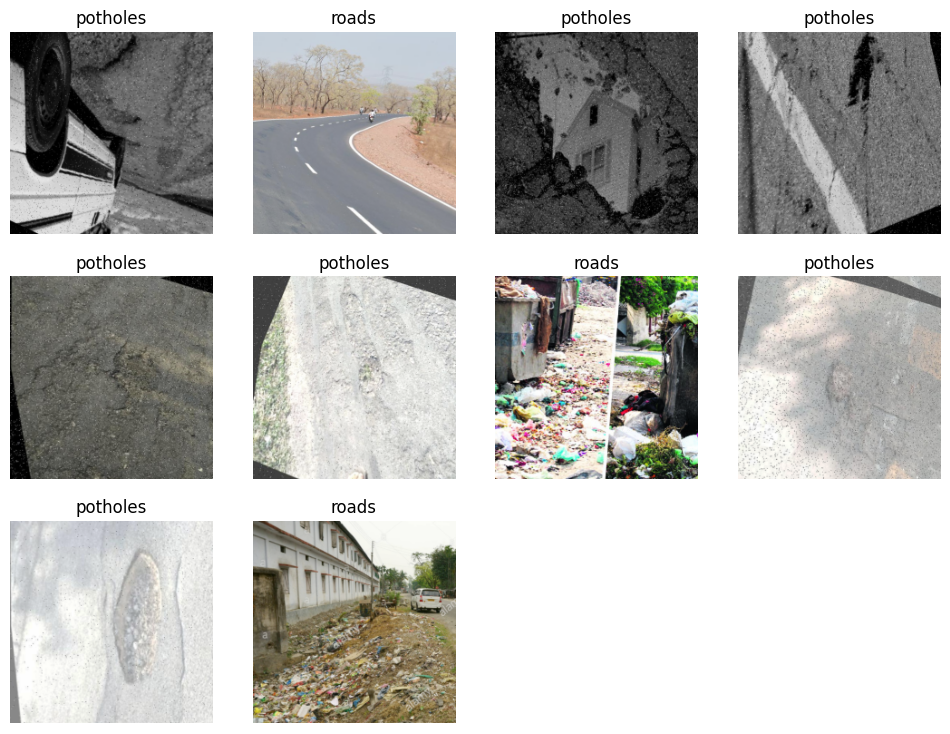

In [8]:
dls = roads.dataloaders(datasets)
dls.show_batch(max_n=10)

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 150MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.800030,0.360172,0.101293,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.263251,0.222502,0.040948,00:19
1,0.134849,0.017264,0.004310,00:19
2,0.074324,0.017335,0.002155,00:18
3,0.043295,0.019422,0.002155,00:19


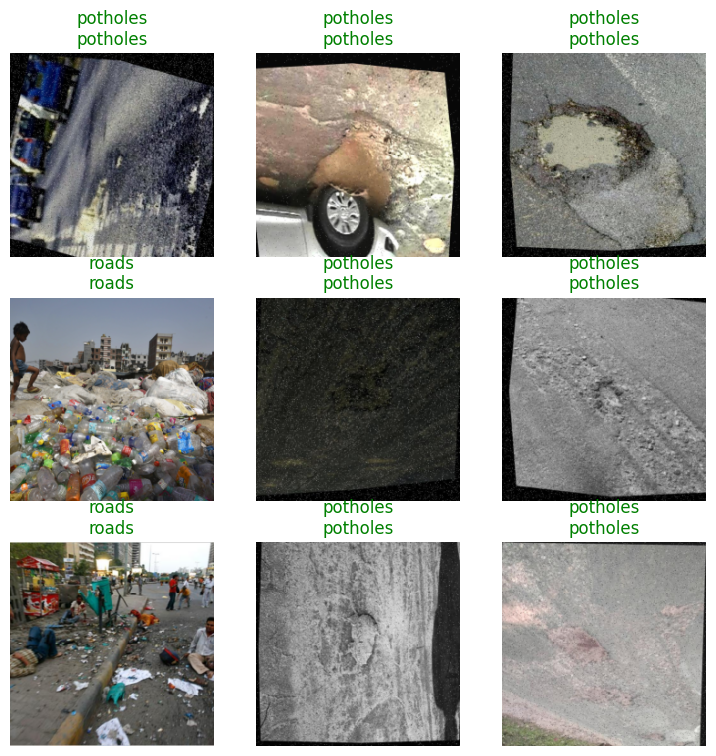

In [10]:
learn.show_results()

# **Testing with external data**

In [29]:
from fastdownload import download_url
from fastai.vision.all import *

In [28]:
urls = [
    "https://upload.wikimedia.org/wikipedia/commons/b/bb/Track_Road_-_viewed_from_Thorncliffe_Road_-_geograph.org.uk_-_3426970.jpg?20220424223011",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/A_pothole_in_Dilova_Street_in_Kyiv.jpg/1200px-A_pothole_in_Dilova_Street_in_Kyiv.jpg?20220726133620"
]

In [38]:
download_url(urls[0], "road.jpg", show_progress=False)
download_url(urls[1], "pothole.jpg", show_progress=False)

Path('pothole.jpg')

In [39]:
im = Image.open("road.jpg")
im.to_thumb(256,256)

UnidentifiedImageError: cannot identify image file 'road.jpg'

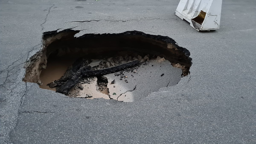

In [32]:
im = Image.open("pothole.jpg")
im.to_thumb(256,256)

**TESTING ROAD IMAGE**

In [16]:
for i in ["road.jpg", "pothole.jpg"]:
    term,_,probs = learn.predict(PILImage.create(i))
    print(f"This is a: {term[:-1]}.")
    print(f"Probability it's a {i[:-4]}: {probs[0]:.4f}")

This is a: road.
Probability it's a road: 0.0000


This is a: pothole.
Probability it's a pothole: 0.9618
